In [1]:
import re
import matplotlib.pyplot as plt
import session_info
plt.rcParams['figure.dpi'] = 300

In [2]:
session_info.show(html=False)

-----
matplotlib          3.7.4
session_info        1.0.0
-----
IPython             8.4.0
jupyter_client      6.1.12
jupyter_core        4.7.1
notebook            6.4.4
-----
Python 3.8.5 (default, Sep  4 2020, 02:22:02) [Clang 10.0.0 ]
macOS-10.16-x86_64-i386-64bit
-----
Session information updated at 2024-01-01 16:49


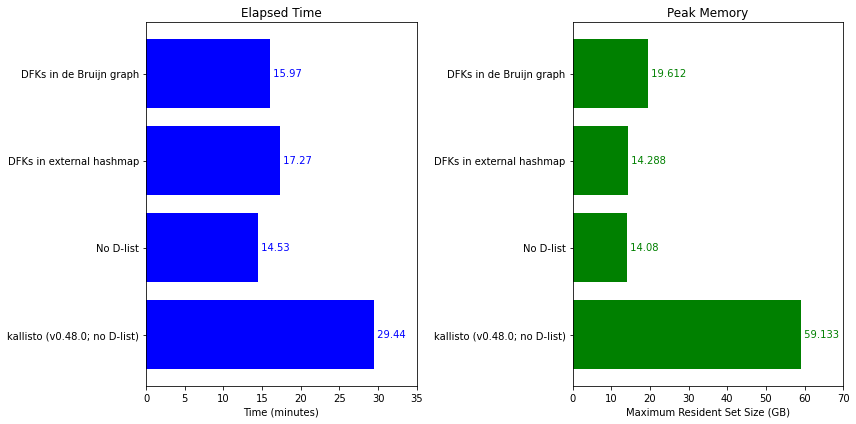

In [3]:
def parse_elapsed_time(text):
    """Extracts and converts elapsed time to minutes from a given text."""
    match = re.search(r"Elapsed \(wall clock\) time \(h:mm:ss or m:ss\): (\d+):(\d+\.\d+)", text)
    if match:
        minutes, seconds = map(float, match.groups())
        total_minutes = minutes + seconds / 60
        return round(total_minutes, 2)  # Round to 2 decimal places for precision
    else:
        return None  # Return None in case of no match

def parse_max_resident_set_size(text):
    """Extracts and converts maximum resident set size to gigabytes from a given text."""
    match = re.search(r"Maximum resident set size \(kbytes\): (\d+)", text)
    if match:
        kbytes = int(match.group(1))
        gigabytes = kbytes / (1000**2)
        return gigabytes
    else:
        return None  # Return None in case of no match

# File names for the y-axis labels
file_names = ["results_kallisto_version_performances/kallisto_0.48.0.txt",
              "results_kallisto_version_performances/kallisto_0.50.1.txt",
              "results_kallisto_version_performances/kallisto_0.50.1_offlist.txt",
              "results_kallisto_version_performances/kallisto_0.50.0_offlist.txt"]
sample_names = ["kallisto (v0.48.0; no D-list)",
               "No D-list",
               "DFKs in external hashmap",
               "DFKs in de Bruijn graph"]

elapsed_times = []
max_resident_sizes = []

# Read each file and parse the data
for file_name in file_names:
    with open(file_name, 'r') as file:
        content = file.read()
        elapsed_time = parse_elapsed_time(content)
        max_res_size = parse_max_resident_set_size(content)
        elapsed_times.append(elapsed_time if elapsed_time is not None else 0)
        max_resident_sizes.append(round(max_res_size,3) if max_res_size is not None else 0)

# Plotting the results with horizontal bars
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Elapsed Time Plot - Horizontal
axes[0].barh(sample_names, elapsed_times, color='blue')
axes[0].set_title('Elapsed Time')
axes[0].set_xlabel('Time (minutes)')
for index, value in enumerate(elapsed_times):
    axes[0].text(value, index, f' {value}', va='center', color='blue')
axes[0].set_xlim(0,35)

# Maximum Resident Set Size Plot - Horizontal
axes[1].barh(sample_names, max_resident_sizes, color='green')
axes[1].set_title('Peak Memory')
axes[1].set_xlabel('Maximum Resident Set Size (GB)')
for index, value in enumerate(max_resident_sizes):
    axes[1].text(value, index, f' {value}', va='center', color='green')
axes[1].set_xlim(0,70)

plt.tight_layout()
plt.show()

